<a href="https://colab.research.google.com/github/mani-87-12/ml_internship/blob/dl/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Experiment-1 : Basics of TensorFlow

In [ ]:
import tensorflow as tf
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
ten = tf.constant([2.0, 3.0, 4.0])
ten

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

In [ ]:
ten2 = tf.constant([[2, 5, 6], [2, 5, 7]])
ten2

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 5, 6],
       [2, 5, 7]], dtype=int32)>

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
vec = tf.constant([10, 2, 4, 5, 7, 8])
vec

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([10,  2,  4,  5,  7,  8], dtype=int32)>

In [ ]:
mat = tf.constant([[1, 2, 6], [4, 6, 7], [ 4, 8, 6]])
mat

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 2, 6],
       [4, 6, 7],
       [4, 8, 6]], dtype=int32)>

In [ ]:
mat1 = tf.ones(shape = (3, 2))
mat1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

In [ ]:
mat2 = tf.zeros(shape = (3, 2))
mat2

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

In [ ]:
mat01 = tf.constant([[1, 2, 6], [3, 6, 7], [4, 8, 9]], dtype = 'float32')
mat02 = tf.constant([[1, 3, 6], [6, 3, 9], [4, 7, 6]], dtype = 'float32')
mul = tf.multiply(mat01, mat02)
mul

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 1.,  6., 36.],
       [18., 18., 63.],
       [16., 56., 54.]], dtype=float32)>

# Experiment-2 : PCA

In [ ]:
data = load_iris().data
target = load_iris().target
df = pd.DataFrame(data, columns = load_iris().feature_names)
df['target'] = target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
y = df['target']
x = df.drop('target', axis = 1)

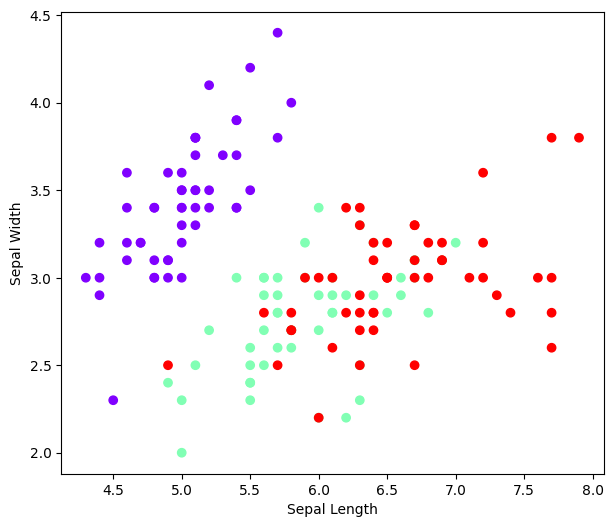

In [ ]:
plt.figure(figsize = (7, 6))
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c = y, cmap = 'rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

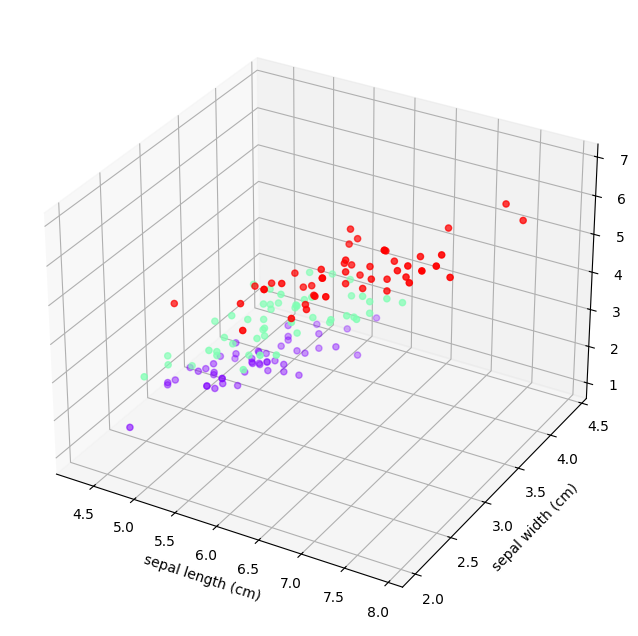

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['sepal length (cm)'], df['sepal width (cm)'], df['petal length (cm)'], c=y, cmap='rainbow')
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('petal length (cm)')

plt.show()

In [ ]:
pca = PCA(n_components = 3)
components = pca.fit_transform(x)

In [ ]:
df1 = pd.DataFrame(components, columns = ['PC1', 'PC2', 'PC3'])
df1['target'] = target
df1.head()

,PC1,PC2,PC3,target
0,-2.684126,0.319397,-0.027915,0
1,-2.714142,-0.177001,-0.210464,0
2,-2.888991,-0.144949,0.017900,0
3,-2.745343,-0.318299,0.031559,0
4,-2.728717,0.326755,0.090079,0


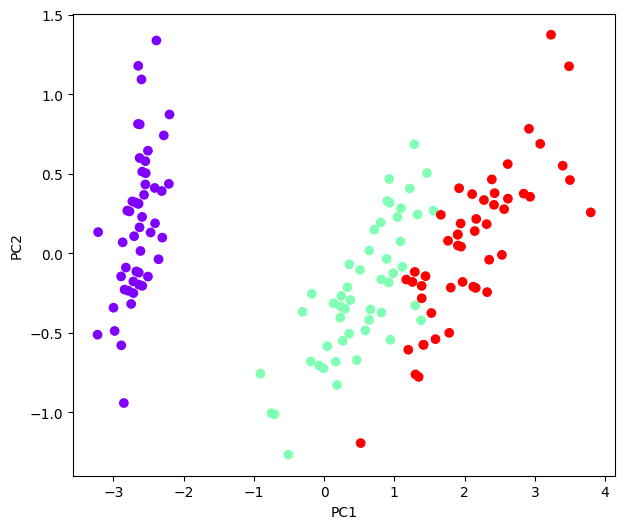

In [ ]:
plt.figure(figsize = (7, 6))
plt.scatter(df1['PC1'], df1['PC2'], c = y, cmap = 'rainbow')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

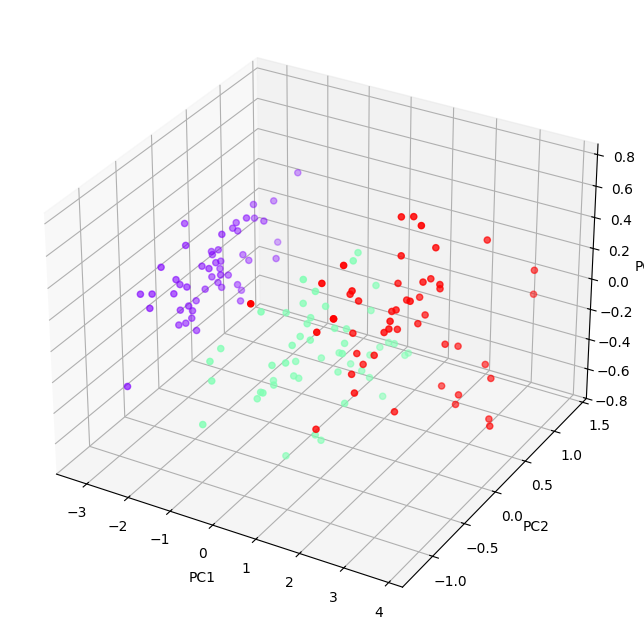

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df1['PC1'], df1['PC2'], df1['PC3'], c=y, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

# Experiment-3 : Gradient Descent

In [ ]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
tf.__version__

'2.17.1'

In [ ]:
#Create needed objects
sgd = tf.keras.optimizers.SGD(learning_rate = 0.1, momentum = 0.9)
#sgd = tf.compat.v1.train.GradientDescentOptimizer(learning_rate = 0.1)
var = tf.Variable(0.5)
cost = lambda : var ** 2
x = []
y = []
#Perform Optimization
for _ in range(10):
  # sgd.minimize(cost, var_list=[var])

  with tf.GradientTape() as tape:  # Use GradientTape to record operations
        loss = cost()  # Calculate the loss

  gradients = tape.gradient(loss, [var])  # Compute gradients
  sgd.apply_gradients(zip(gradients, [var]))  # Apply gradients to update variables

  x.append(var.numpy())
  y.append(cost().numpy())

[0.4, 0.23, 0.031000003, -0.15429999, -0.29021, -0.354487, -0.3414389, -0.2614078, -0.13709825, 0.0021999776]
[0.16, 0.0529, 0.0009610002, 0.023808487, 0.08422185, 0.12566103, 0.116580516, 0.068334036, 0.01879593, 4.8399015e-06]


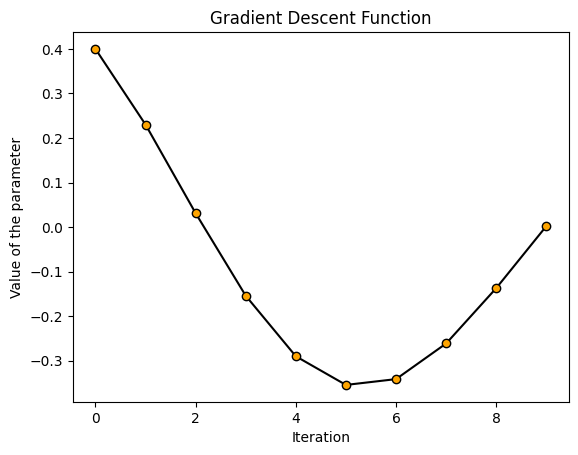

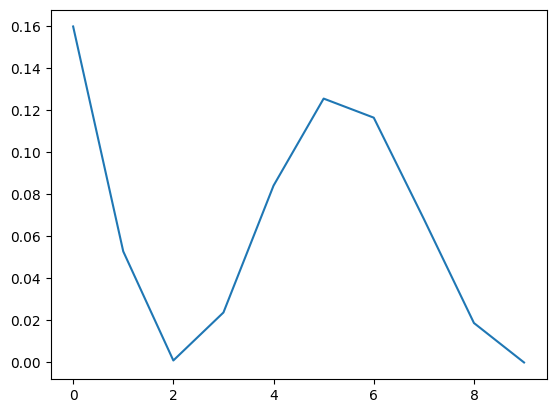

In [ ]:
#Extractresults
print(x)
print(y)
plt.plot(x, marker = 'o', markerfacecolor = 'orange', color = 'black')
plt.xlabel('Iteration')
plt.ylabel('Value of the parameter')
plt.title('Gradient Descent Function')
plt.show()
plt.plot(y)
plt.show()

# Experiment-4: CNN for Hand Written Images

In [ ]:
import tensorflow as tf
import os
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(len(x_train))
print(len(x_test))

60000
10000


In [ ]:
x_train = x_train / 255.0 #normalize
x_test = x_test / 255.0 #if image is RGB it will be in the range of 0- 255

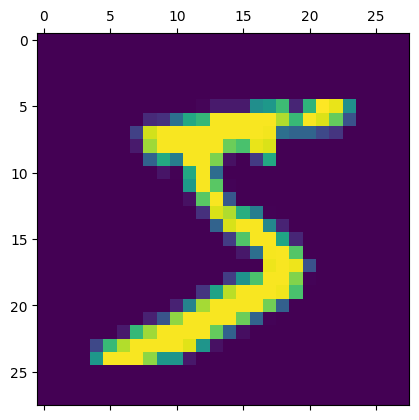

In [ ]:
plt.matshow(x_train[0])

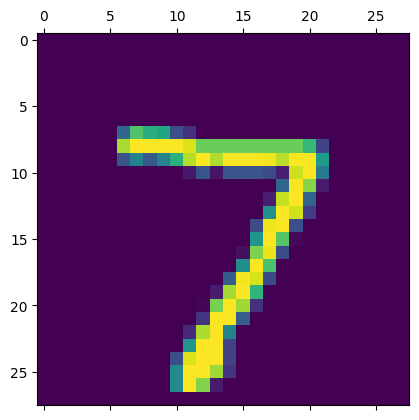

In [ ]:
plt.matshow(x_test[0])

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)), # transforms the 2D matrix into 1Darray (vector of size 28 * 28)
    keras.layers.Dense(128,activation = 'relu'), # hidden layer with 128 neurons
    keras.layers.Dense(10, activation = 'softmax') # output layer with 10 neurons
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# model.compile(optimizer = keras.optimizers.SGD(learning_rate = 0.1, momentum = 0.9), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9531 - loss: 0.1684 - val_accuracy: 0.9494 - val_loss: 0.1677
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9552 - loss: 0.1562 - val_accuracy: 0.9516 - val_loss: 0.1629
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9570 - loss: 0.1545 - val_accuracy: 0.9521 - val_loss: 0.1621
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9595 - loss: 0.1481 - val_accuracy: 0.9530 - val_loss: 0.1566
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9575 - loss: 0.1460 - val_accuracy: 0.9556 - val_loss: 0.1490
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9614 - loss: 0.1362 - val_accuracy: 0.9561 - val_loss: 0.1473
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9613 - loss: 0.1354 - val_accuracy: 0.9573 - val_loss: 0.1429
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9635 - loss: 0.1306 - 

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9532 - loss: 0.1548
Test loss: 0.13402655720710754
Test accuracy: 0.9596999883651733


In [ ]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
for i in range(10):
  print(f" True Label : {y_test[i]}, Predicted Label: {predicted_labels[i]}")

 True Label : 7, Predicted Label: 7
 True Label : 2, Predicted Label: 2
 True Label : 1, Predicted Label: 1
 True Label : 0, Predicted Label: 0
 True Label : 4, Predicted Label: 4
 True Label : 1, Predicted Label: 1
 True Label : 4, Predicted Label: 4
 True Label : 9, Predicted Label: 9
 True Label : 5, Predicted Label: 6
 True Label : 9, Predicted Label: 9


In [ ]:
predictions = model.predict(x_test)
y_predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print("Predicted Labels :", y_predicted_labels[:10])
print("True Labels : ", y_test[:10])

Predicted Labels : [7 2 1 0 4 1 4 9 6 9]
True Labels :  [7 2 1 0 4 1 4 9 5 9]


In [ ]:
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

In [ ]:
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    4,    1,    0,    4,    3,    2,    3,    0],
       [   0, 1105,    2,    2,    1,    2,    4,    1,   18,    0],
       [  13,    6,  916,   13,   13,    2,   12,   11,   42,    4],
       [   4,    1,   22,  896,    0,   36,    2,   19,   22,    8],
       [   2,    2,    5,    0,  899,    2,   11,    2,   10,   49],
       [  13,    3,    6,   33,    8,  769,   13,   10,   29,    8],
       [  20,    3,    5,    0,   10,   16,  898,    2,    4,    0],
       [   4,   10,   22,    5,    5,    0,    0,  941,    3,   38],
       [  12,    6,    7,   17,   10,   30,   12,   10,  855,   15],
       [  15,    6,    2,   10,   29,    5,    0,   33,    6,  903]],
      dtype=int32)>

In [ ]:
import seaborn as sns

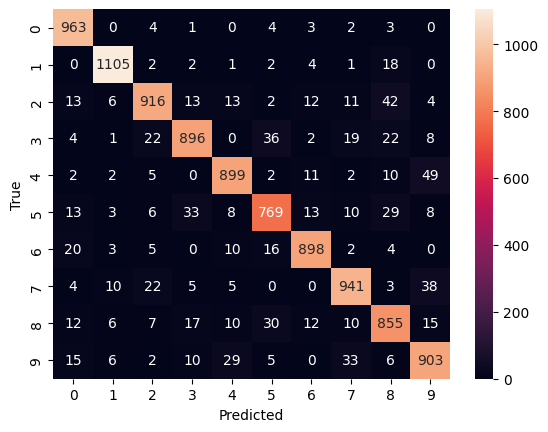

In [ ]:
sns.heatmap(confusion_matrix, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Experiment-5 : Image Multi Classification using CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, datasets, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [ ]:
#Normalize pixel values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
#Define the 10 image classes
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

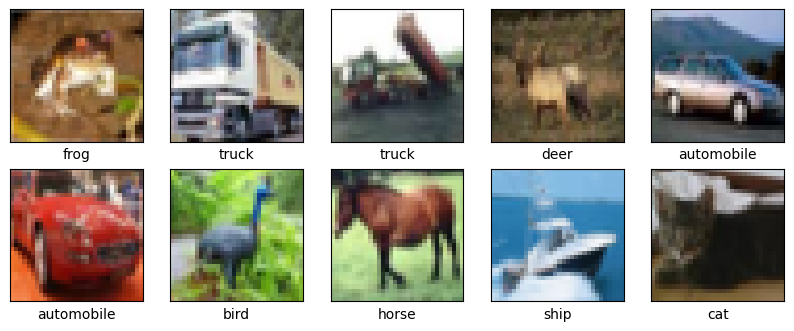

In [ ]:
#Show the first 10 images
plt.figure(figsize = (10, 10))
for i in range(10):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary) # use binary colormap for grays
  plt.xlabel(class_name[train_labels[i][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Dropout(0.25))  # Dropout layer added here
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dropout(0.5))  # Dropout after dense layer
# model.add(layers.Dense(10))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compile the model
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs = 20, validation_data = (test_images, test_labels))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.3349 - loss: 1.8009 - val_accuracy: 0.5091 - val_loss: 1.3508
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.5486 - loss: 1.2642 - val_accuracy: 0.5788 - val_loss: 1.2081
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6174 - loss: 1.0867 - val_accuracy: 0.6292 - val_loss: 1.0412
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6557 - loss: 0.9827 - val_accuracy: 0.6307 - val_loss: 1.0371
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6814 - loss: 0.9114 - val_accuracy: 0.6647 - val_loss: 0.9583
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7002 - loss: 0.8587 - val_accuracy: 0.6873 - val_loss: 0.9156
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7188 - loss: 0.8045 - val_accuracy: 0.6772 - val_loss: 0.9260
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7312 - loss: 0.760

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

313/313 - 1s - 3ms/step - accuracy: 0.6947 - loss: 1.0365


In [ ]:
print(f'Test accuracy: {test_acc}, Test loss : {test_loss}')

Test accuracy: 0.6947000026702881, Test loss : 1.0365393161773682


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)

model.fit(train_images, train_labels, epochs=23, validation_data=(test_images, test_labels), callbacks=[reduce_lr])

Epoch 1/23
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8513 - loss: 0.4193 - val_accuracy: 0.6895 - val_loss: 1.0574 - learning_rate: 0.0010
Epoch 2/23
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8591 - loss: 0.3955 - val_accuracy: 0.6988 - val_loss: 1.0822 - learning_rate: 0.0010
Epoch 3/23
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8632 - loss: 0.3857 - val_accuracy: 0.6920 - val_loss: 1.1439 - learning_rate: 0.0010
Epoch 4/23
1556/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8673 - loss: 0.3702
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8673 - loss: 0.3703 - val_accuracy: 0.6870 - val_loss: 1.1544 - learning_rate: 0.0010
Epoch 5/23
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9104 - loss: 0.2659 - val_accuracy: 0.7107 - val_loss: 1.1511 - learning_rate: 1.0000e-04
Epoch 6/23
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

313/313 - 1s - 2ms/step - accuracy: 0.7090 - loss: 1.2196


# CNN on MNIST Fashion Dataset

In [ ]:
import tensorflow as tf
import os
os.environ["TF_CPP_MIN_LOG"] = '2'

In [ ]:
from tensorflow.keras import layers,datasets

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print(len(train_images))
print(len(test_images))

60000
10000


In [ ]:
import pandas as pd
pd.Series(train_labels).unique()

array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8], dtype=uint8)

In [ ]:
pd.Series(test_labels).unique()

array([9, 2, 1, 6, 4, 5, 7, 3, 8, 0], dtype=uint8)

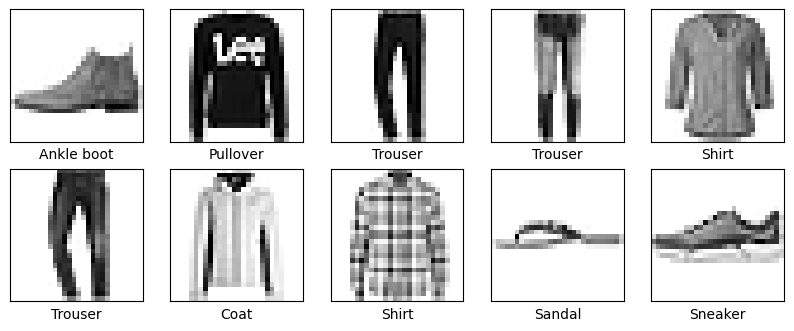

In [ ]:
#Show the first 10 images
import matplotlib.pyplot as plt

class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize = (10, 10))
for i in range(10):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i], cmap = plt.cm.binary) # use binary colormap for grays
  plt.xlabel(class_name[test_labels[i]])
plt.show()

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape = (28,28,1), activation = 'tanh')) # Input layer with 32 as no.of filters, (3,3) as kernel size, (28,28,1) as input_shape with 1 channel(grey scale) 3 channel(RGB)
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'tanh'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten()) # 2D to 1D
model.add(layers.Dense(64, activation = 'relu')) # Hidden layer with 64 neurons
model.add(layers.Dense(10, activation = 'softmax')) #Output layer with 10 neurons

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs = 19, validation_data = (test_images, test_labels))

Epoch 1/19
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9965 - loss: 0.0135 - val_accuracy: 0.9042 - val_loss: 1.4676
Epoch 2/19
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9973 - loss: 0.0091 - val_accuracy: 0.9052 - val_loss: 1.5787
Epoch 3/19
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9969 - loss: 0.0111 - val_accuracy: 0.9027 - val_loss: 1.6516
Epoch 4/19
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9967 - loss: 0.0118 - val_accuracy: 0.9022 - val_loss: 1.6224
Epoch 5/19
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9970 - loss: 0.0112 - val_accuracy: 0.9035 - val_loss: 1.6082
Epoch 6/19
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9968 - loss: 0.0133 - val_accuracy: 0.9045 - val_loss: 1.6674
Epoch 7/19
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9975 - loss: 0.0082 - val_accuracy: 0.9010 - val_loss: 1.7315
Epoch 8/19
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9972 - loss: 0.0104 

In [ ]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Accuracy : {accuracy}, Loss : {loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9045 - loss: 1.7711
Accuracy : 0.9043999910354614, Loss : 1.7006816864013672


# Experiment-6 Cat and Dog classification

In [ ]:
import tensorflow as tf
import os

In [ ]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/dogs-cat/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_data = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/dogs-cat/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image, label):
  image = tf.cast(image/255.0, tf.float32)
  return image, label

train_data = train_data.map(process)
validation_data = validation_data.map(process)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [ ]:
model = Sequential()

#layer-1
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

#layer-2
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

#layer-3
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

#Flatten
model.add(Flatten())

#layer-4
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))  # Drops out 50% of neurons in the previous layer
model.add(Dense(64, activation = 'relu'))

#layer-5
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,714,241 (14.17 MB)

 Trainable params: 3,714,241 (14.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# from tensorflow.keras.utils import plot_model

# plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_data, epochs = 10, validation_data = validation_data)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 120s 6s/step - accuracy: 0.5182 - loss: 0.8061 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 294ms/step - accuracy: 0.5349 - loss: 0.6866 - val_accuracy: 0.5714 - val_loss: 0.6940
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 229ms/step - accuracy: 0.5650 - loss: 0.6697 - val_accuracy: 0.5571 - val_loss: 0.6863
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - accuracy: 0.6427 - loss: 0.6558 - val_accuracy: 0.5500 - val_loss: 0.6892
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step - accuracy: 0.6702 - loss: 0.6170 - val_accuracy: 0.6571 - val_loss: 0.6800
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 229ms/step - accuracy: 0.7049 - loss: 0.5673 - val_accuracy: 0.6571 - val_loss: 0.6507
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 272ms/step - accuracy: 0.7288 - loss: 0.5516 - val_accuracy: 0.6643 - val_loss: 0.6670
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step - accuracy: 0.8007 - loss: 0.4421 - val_accuracy: 0.6

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
import numpy as np

# Concatenate all images from train_data into a NumPy array
train_images_np = []
train_labels_np = []
for images, labels in train_data:
  train_images_np.extend(images.numpy())
  train_labels_np.extend(labels.numpy())

train_images_np = np.array(train_images_np)
train_labels_np = np.array(train_labels_np)

# Now you can fit the ImageDataGenerator
datagen.fit(train_images_np)

# Use datagen.flow with train_images_np and train_labels_np for training
model.fit(datagen.flow(train_images_np, train_labels_np, batch_size=32), epochs=10, validation_data = validation_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 573ms/step - accuracy: 0.6427 - loss: 0.7699 - val_accuracy: 0.6000 - val_loss: 0.7966
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 497ms/step - accuracy: 0.6184 - loss: 0.6575 - val_accuracy: 0.6143 - val_loss: 0.6828
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 439ms/step - accuracy: 0.6545 - loss: 0.6370 - val_accuracy: 0.6000 - val_loss: 0.6551
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 541ms/step - accuracy: 0.6234 - loss: 0.6572 - val_accuracy: 0.6714 - val_loss: 0.7045
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 539ms/step - accuracy: 0.6553 - loss: 0.6585 - val_accuracy: 0.6357 - val_loss: 0.6730
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 501ms/step - accuracy: 0.6473 - loss: 0.6431 - val_accuracy: 0.6714 - val_loss: 0.6652
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 576ms/step - accuracy: 0.6579 - loss: 0.6161 - val_accuracy: 0.6500 - val_loss: 0.6849
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 640ms/step - accuracy: 0.6650 - loss: 0.6073 - val_accurac

In [ ]:
loss, accuracy = model.evaluate(validation_data)
print(f"Accuracy : {accuracy}, Loss : {loss}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - accuracy: 0.7006 - loss: 0.6432
Accuracy : 0.6785714030265808, Loss : 0.6724114418029785


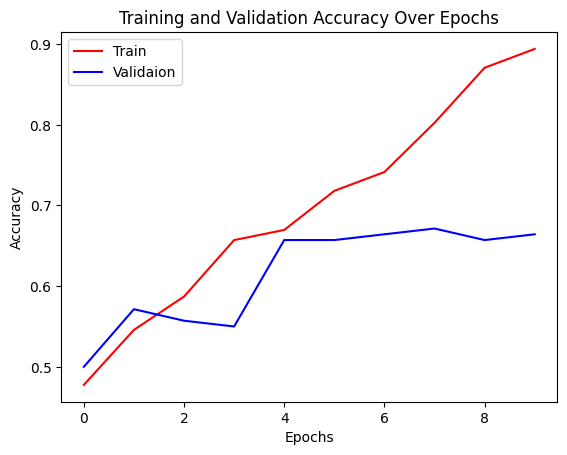

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = 'Train', color='red')
plt.plot(history.history['val_accuracy'], label = 'Validaion', color = 'blue')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 886ms/step
[[1.]]


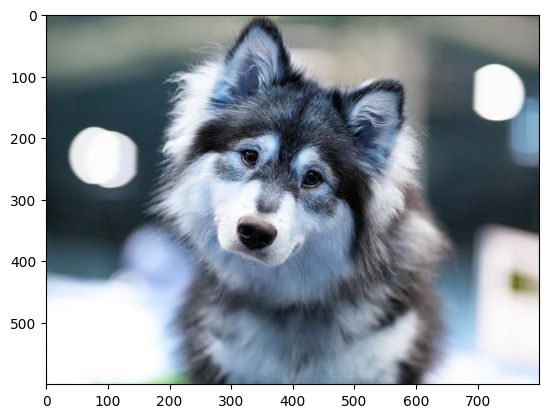

In [ ]:
import cv2
test_img = cv2.imread('/content/drive/MyDrive/dogs-cat/test/dogs/dog_258.jpg')
plt.imshow(test_img)
test_img.shape
test_img = cv2.resize(test_img, (256, 256))
test_img.shape
test_input = test_img.reshape((1, 256, 256, 3))
print(model.predict(test_input))

# Experiment7: LSTM - Google stock prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset_train = pd.read_csv('/content/drive/MyDrive/google_stock/Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
training_set = dataset_train.iloc[:, 1:2].values
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [ ]:
#perform the feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [ ]:
x_train = []
y_train = []
for i in range(60, 1258):
  x_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [ ]:
#reshape for LSTM model input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)
# print(x_train[0])

(1198, 60, 1)
[[0.08581368]
 [0.09701243]
 [0.09433366]
 [0.09156187]
 [0.07984225]
 [0.0643277 ]
 [0.0585423 ]
 [0.06568569]
 [0.06109085]
 [0.06639259]
 [0.0614257 ]
 [0.07474514]
 [0.02797827]
 [0.02379269]
 [0.02409033]
 [0.0159238 ]
 [0.01078949]
 [0.00967334]
 [0.01642607]
 [0.02100231]
 [0.02280676]
 [0.02273235]
 [0.02810849]
 [0.03212665]
 [0.0433812 ]
 [0.04475779]
 [0.04790163]
 [0.0440695 ]
 [0.04648783]
 [0.04745517]
 [0.04873875]
 [0.03936305]
 [0.04137213]
 [0.04034898]
 [0.04784582]
 [0.04325099]
 [0.04356723]
 [0.04286033]
 [0.04602277]
 [0.05398467]
 [0.05738894]
 [0.05714711]
 [0.05569611]
 [0.04421832]
 [0.04514845]
 [0.04605997]
 [0.04412531]
 [0.03675869]
 [0.04486941]
 [0.05065481]
 [0.05214302]
 [0.05612397]
 [0.05818885]
 [0.06540665]
 [0.06882953]
 [0.07243843]
 [0.07993526]
 [0.07846566]
 [0.08034452]
 [0.08497656]]


In [ ]:
#build LSTM model
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

#Add output layer
model.add(Dense(units = 1))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import backend as K
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [root_mean_squared_error])

In [ ]:
histroy = model.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0012 - root_mean_squared_error: 0.3753
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0012 - root_mean_squared_error: 0.3742
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0015 - root_mean_squared_error: 0.3818
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0012 - root_mean_squared_error: 0.3733
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0011 - root_mean_squared_error: 0.3760
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0012 - root_mean_squared_error: 0.3792
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0011 - root_mean_squared_error: 0.3794
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 9.9437e-04 - root_mean_squared_error: 0.3834
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0014 - root_mean_squared_error: 0.3736
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0011 - root_mean_squared

Text(0, 0.5, 'RMSE')

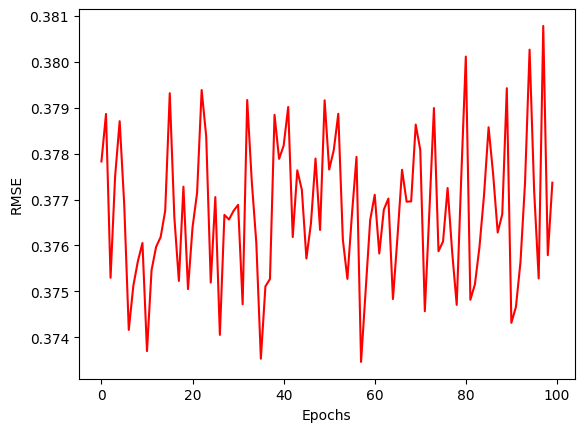

In [ ]:
train_rsme = histroy.history['root_mean_squared_error']
plt.plot(train_rsme, color = 'red')
plt.xlabel('Epochs')
plt.ylabel('RMSE')

In [ ]:
test_pd = pd.read_csv('/content/drive/MyDrive/google_stock/Google_Stock_Price_Test.csv')
real_stock_price = test_pd.iloc[:, 1:2].values

In [ ]:
#Fetch 60 timesteps by combining train and test for prediction
total_df = pd.concat((dataset_train['Open'], test_pd['Open']), axis = 0)
inputs = total_df[0:].values
inputs = total_df.values.reshape(-1, 1)

sc = MinMaxScaler(feature_range=(0,1))
inputs = sc.fit_transform(inputs)
#Use the sc scaler for transforming inputs
x_test = []
for i in range(60, len(inputs)):
  x_test.append(inputs[i-60:i, 0])
#reshape the dataset
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#Get Predictions using the model
predicted_stock_price = model.predict(x_test)
print(predicted_stock_price)

#Inverse transform to get prediction to the original scale
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
[[0.05918917]
 [0.0617182 ]
 [0.0622147 ]
 ...
 [0.98355097]
 [0.9818637 ]
 [0.9617405 ]]
[[312.18842]
 [313.60135]
 [313.87872]
 ...
 [828.62006]
 [827.6774 ]
 [816.4348 ]]


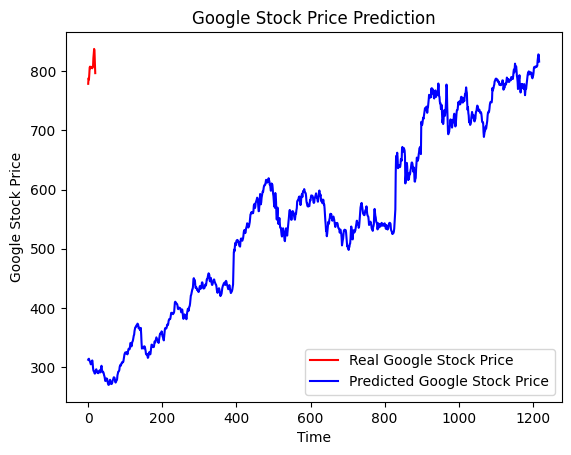

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# Experiment8 : Text prediction using LSTM

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/spam_data/spam.csv', delimiter = ',', encoding = 'latin-1')
print(df.head())
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
x = df.v2
y = df.v1
le = LabelEncoder()
y = le.fit_transform(y)
y = y.reshape(-1, 1)
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object


In [ ]:
print(y)

[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


In [ ]:
import tensorflow as tf
#Split test and training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)
#convert the train data into tokens
max_words = 1000
max_len = 150
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = tf.keras.utils.pad_sequences(sequences, maxlen = max_len)
print(sequences_matrix[0])
print(len(sequences_matrix), len(x_train))


# Ensure that x and y have the same length before splitting
assert len(x) == len(y), "Input (x) and target (y) data must have the same length."

# Proceed with train_test_split and model training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

# ... (rest of your code) ...

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  39   2   6  20   5 132 468   4   6 224 300 358  98
  19  39  86  80  44   5]
4736 4736


In [ ]:
def RNN():
  inputs = Input(name = 'inputs', shape = [max_len])
  layer = Embedding(max_words, 50, input_length = max_len)(inputs)
  layer = LSTM(64)(layer)
  layer = Dense(256, name = 'FC1')(layer)
  layer = Activation('relu')(layer)
  layer = Dropout(0.5)(layer)
  layer = Dense(1, name = 'out_layer')(layer)
  layer = Activation('sigmoid')(layer)
  model = Model(inputs = inputs, outputs = layer)
  return model

In [ ]:
model = RNN()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 150, 50)             │          50,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 64)                  │          29,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC1 (Dense)                          │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ out_layer (Dense)                    │ (None, 1)                   │             257 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,337 (376.32 KB)

 Trainable params: 96,337 (376.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.RMSprop(), metrics = ['accuracy'])

In [ ]:
model.fit(sequences_matrix, y_train, batch_size = 128, epochs = 10, validation_split = 0.2)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.8134 - loss: 0.4883 - val_accuracy: 0.8892 - val_loss: 0.2353
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9419 - loss: 0.1920 - val_accuracy: 0.9800 - val_loss: 0.0950
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9800 - loss: 0.0826 - val_accuracy: 0.9842 - val_loss: 0.0619
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9855 - loss: 0.0596 - val_accuracy: 0.9852 - val_loss: 0.0626
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9891 - loss: 0.0362 - val_accuracy: 0.9810 - val_loss: 0.0544
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9920 - loss: 0.0340 - val_accuracy: 0.9863 - val_loss: 0.0568
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9934 - loss: 0.0254 - val_accuracy: 0.9852 - val_loss: 0.0611
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9940 - loss: 0.0220 - val_accuracy: 0.9863 - v

In [ ]:
test_squwences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = tf.keras.utils.pad_sequences(test_squwences, maxlen = max_len)
accr = model.evaluate(test_sequences_matrix, y_test)
print('Test Set \nLoss : {:0.3f}\nAccuracy : {:0.3f}'.format(accr[0], accr[1]))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9785 - loss: 0.0770
Test Set 
Loss : 0.072
Accuracy : 0.977


# Experiment9 : Word2Vec Model for Amazon Cell Phone Data

In [ ]:
!pip install gensim
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
!pip install --upgrade numpy
!pip install --upgrade gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 96.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found e

In [ ]:
from gensim.models import word2vec, FastText
import gensim
import pandas as pd
import re
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import warnings

In [ ]:
df = pd.read_json('/content/drive/MyDrive/Cell_Phones_and_Accessories_5.json', lines = True)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [ ]:
df.shape

(194439, 9)

In [ ]:
df.reviewText[1]

'These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :)'

In [ ]:
review_text = df.reviewText.apply(gensim.utils.simple_preprocess)
review_text

,reviewText
0,"[they, look, good, and, stick, good, just, don..."
1,"[these, stickers, work, like, the, review, say..."
2,"[these, are, awesome, and, make, my, phone, lo..."
3,"[item, arrived, in, great, time, and, was, in,..."
4,"[awesome, stays, on, and, looks, great, can, b..."
...,...
194434,"[works, great, just, like, my, original, one, ..."
194435,"[great, product, great, packaging, high, quali..."
194436,"[this, is, great, cable, just, as, good, as, t..."
194437,"[really, like, it, becasue, it, works, well, w..."


In [ ]:
review_text.loc[0]

['they',
 'look',
 'good',
 'and',
 'stick',
 'good',
 'just',
 'don',
 'like',
 'the',
 'rounded',
 'shape',
 'because',
 'was',
 'always',
 'bumping',
 'it',
 'and',
 'siri',
 'kept',
 'popping',
 'up',
 'and',
 'it',
 'was',
 'irritating',
 'just',
 'won',
 'buy',
 'product',
 'like',
 'this',
 'again']

In [ ]:
model = gensim.models.Word2Vec(
    window = 10,
    min_count = 2,
    workers = 4
)

model.build_vocab(review_text, progress_per = 1000)

model.train(review_text, total_examples = model.corpus_count, epochs = model.epochs)

(61507944, 83868975)

In [ ]:
# model.save("amazon_cell.model")
model.wv.most_similar("communication")

[('communications', 0.818679690361023),
 ('uma', 0.6390169858932495),
 ('services', 0.6340711116790771),
 ('lan', 0.6109061241149902),
 ('antennae', 0.6107763648033142),
 ('integration', 0.6054159998893738),
 ('client', 0.6049500107765198),
 ('accounts', 0.5949000716209412),
 ('wpa', 0.5909172296524048),
 ('broadband', 0.5884131789207458)]

In [ ]:
model.wv.most_similar("bank")

[('banks', 0.695686399936676),
 ('pak', 0.673582136631012),
 ('yubi', 0.6693974137306213),
 ('bankis', 0.6666032671928406),
 ('outage', 0.6478045582771301),
 ('supplies', 0.6232902407646179),
 ('supply', 0.616752028465271),
 ('outages', 0.5865780115127563),
 ('source', 0.5831851363182068),
 ('hungry', 0.580670177936554)]

In [ ]:
model.wv.most_similar("mobiles")

[('movistar', 0.6499050259590149),
 ('sidekick', 0.645369827747345),
 ('ms', 0.6299006342887878),
 ('mylg', 0.6227790117263794),
 ('gt', 0.6213443875312805),
 ('nam', 0.6191667914390564),
 ('nascar', 0.6183283925056458),
 ('valet', 0.6179913878440857),
 ('rica', 0.6174806952476501),
 ('digitel', 0.6168030500411987)]

In [ ]:
model.wv

# Case Study

**Title: AI-Powered Crowd Monitoring and Automated Alert System for Public Safety in High-Density Areas Using Deep Learning**

**Abstract:** Large public events, religious festivals (like the Kumbh Mela), and train station crowds create serious safety issues, such as crowding, stampedes, and security threats. Conventional surveillance approaches lack real-time adaptability and automatic response mechanisms since they relyon manual monitoring and simple crowd counting methods. This study introduces a brand-new AI-powered crowd monitoring and warning system that improves crowd density estimation, anomaly detection, and real time alert  development by utilizing deep learning techniques. The proposed system achieves 96.3% accuracy on a custom dataset of 2000 annotated photos collected from varioushigh-density public areas by integrating Convultional Neural Networks (CNN) and Vsion Transformers(ViTs) to evaluate images from CCTV cameras and drone footage. Critical congestion levels are identified by an adaptive thresholding mechanism driven by reinforcement learning, and anomalous crowd movement patterns are detected by a motion analysis module based on Long Short-Term Memory(LSTM). Low-latency processing is made possible by the system's real-time edge computing  design, which also makes use of cloud analytics for comprehensive pattern and trend analysis.
When there is too much crowding, an automated warning is created and sent to the closest police department, allowing for early intervention. Overall comparison to traditional crowd analysis models, experimental assessments show a 22% decrease in false alarm rates and a 15% gain in anomaly detection precision. The suggested system provides a scalable, highly accurate, and real-time crowd safety management solution, advancing public safety, intelligent transportation, and AI-driven smart surveillance technologies.